
### Distribution plots displays a single continuous feature and help visualize properties such as deviation and average values.

## There are 3 main distribution plot types:
* Rug plot
* Histogram plot
* KDE plot

In [1]:
# Install Seaborn (if not already installed)
# pip install seaborn

# Import libraries
import pandas as pd           # For handling data
import seaborn as sns          # For visualization
import matplotlib.pyplot as plt # For advanced customization

# Load CSV file into DataFrame
df = pd.read_csv("12_dm_office_sales.csv")

# View first 5 rows
df.head()

# View dataset info (columns, types, nulls)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


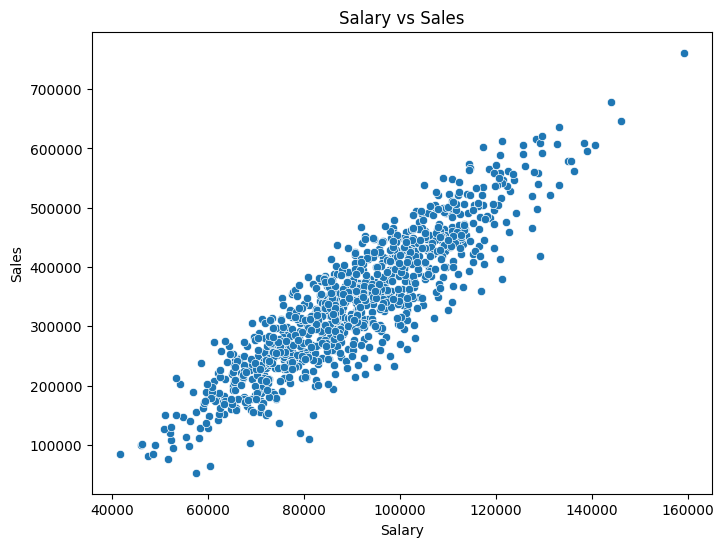

In [2]:
# Basic scatter plot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))                       # set a comfortable figure size
sns.scatterplot(x='salary', y='sales', data=df) # basic scatter: x and y columns from df
plt.title("Salary vs Sales")                    # add a title
plt.xlabel("Salary")                            # x-axis label
plt.ylabel("Sales")                             # y-axis label
plt.show()                                      # draw the plot


<Axes: xlabel='salary', ylabel='sales'>

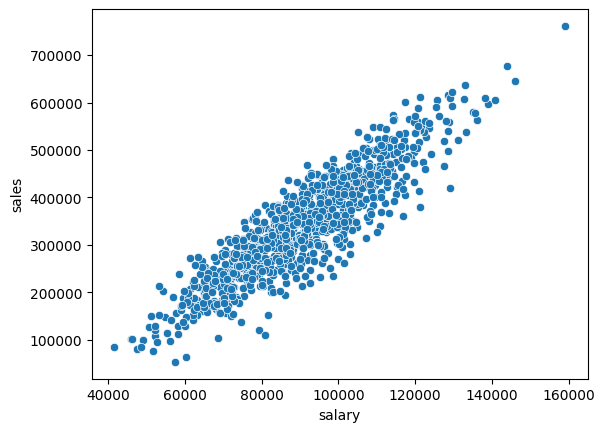

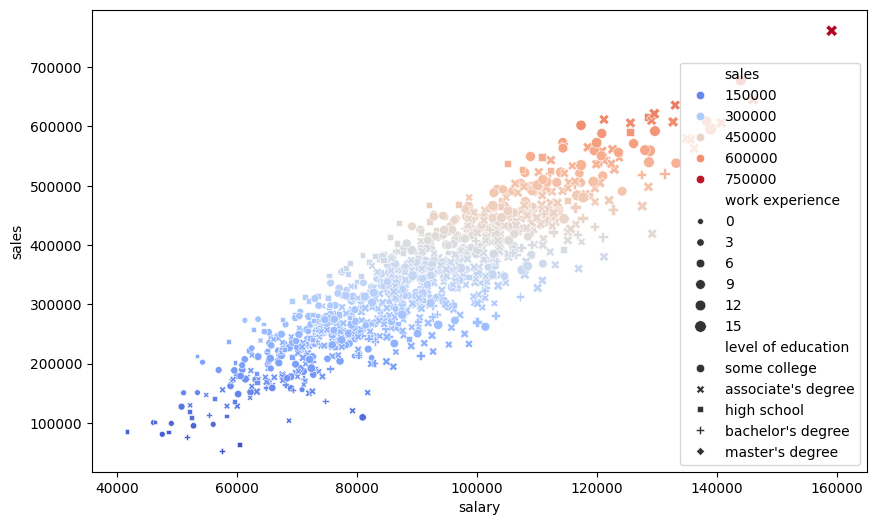

In [3]:
# Basic scatter plot
sns.scatterplot(
    x='salary',   # X-axis: salary column
    y='sales',    # Y-axis: sales column
    data=df       # Source DataFrame
)

# Enhanced scatter plot with categories and styles
plt.figure(figsize=(10,6))  # Set figure size
sns.scatterplot(
    x='salary',
    y='sales',
    data=df,
    hue='sales',         # Color points by sales
    style='level of education',   # Different marker shapes for level of education
    size='work experience',    # Size points by years of work experience
    palette='coolwarm'    # Color scheme
)


<Axes: xlabel='work experience', ylabel='sales'>

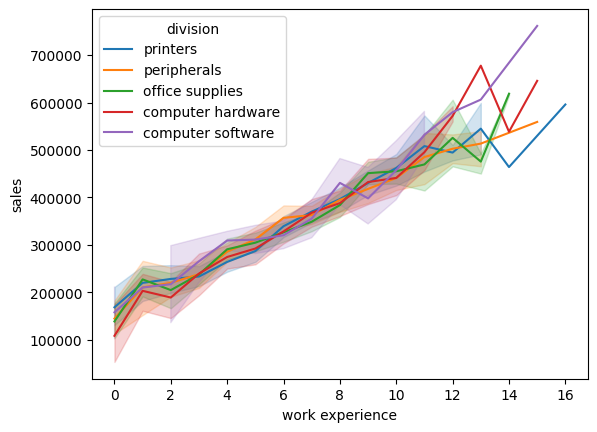

In [4]:
sns.lineplot(
    x='work experience',     # X-axis: experience in years
    y='sales',          # Y-axis: sales value
    data=df,
    hue='division'    # Different line per division
)


<Axes: xlabel='salary', ylabel='Count'>

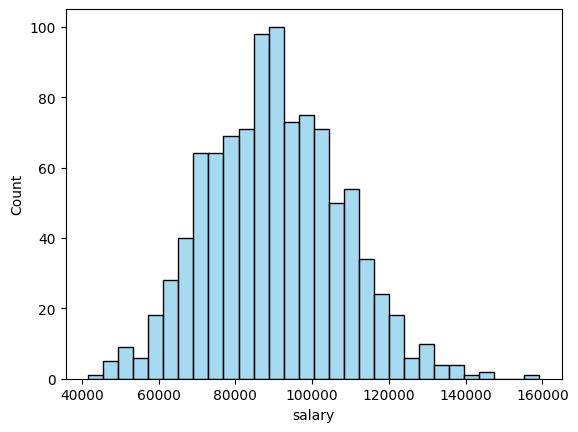

In [5]:
sns.histplot(
    data=df,
    x='salary',     # Column to plot
    bins=30,        # Number of intervals
    color='skyblue' # Bar color
)


C:\Users\Victus\AppData\Local\Temp\ipykernel_20072\1737685967.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


<Axes: xlabel='salary', ylabel='Density'>

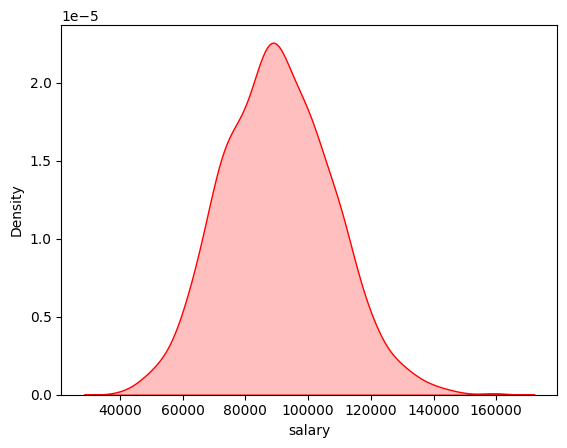

In [6]:
sns.kdeplot(
    df['salary'],   # Data to plot
    shade=True,     # Fill the area under curve
    color='red'     # Curve color
)


<Axes: xlabel='salary', ylabel='Count'>

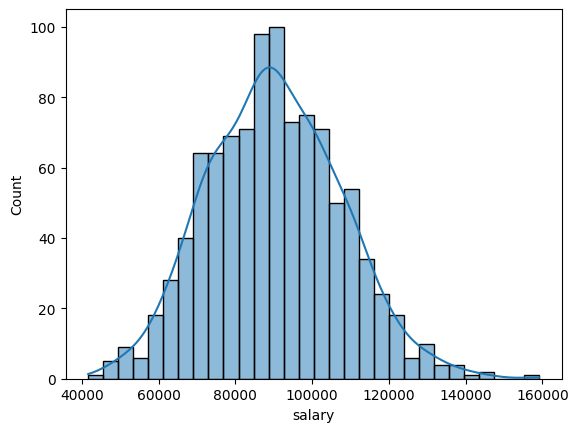

In [7]:
sns.histplot(
    df['salary'],
    kde=True,       # Overlay KDE curve
    bins=30
)


<Axes: xlabel='salary'>

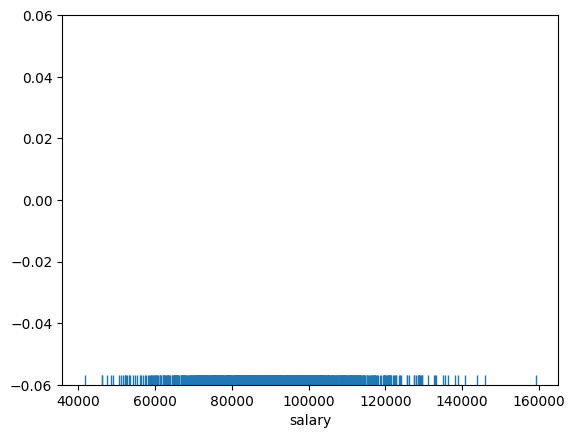

In [8]:
sns.rugplot(df['salary'])


<Axes: xlabel='division', ylabel='salary'>

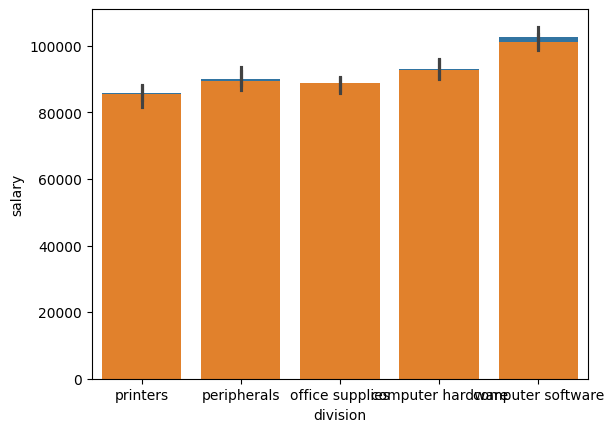

In [9]:

from numpy import median

# Mean salary per department
sns.barplot(x='division', y='salary', data=df)

# Median salary per department
sns.barplot(x='division', y='salary', data=df, estimator=median)


<Axes: xlabel='division', ylabel='count'>

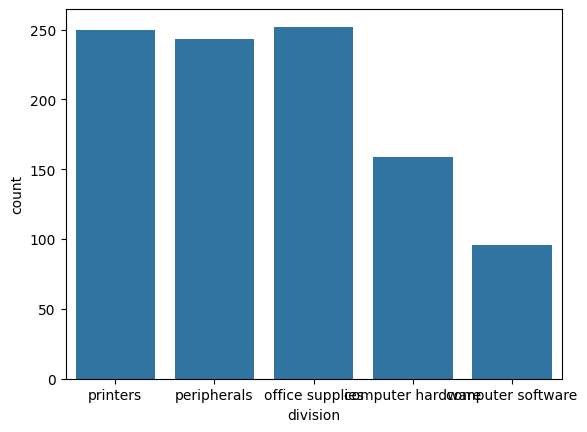

In [10]:
sns.countplot(x='division', data=df)

<Axes: xlabel='division', ylabel='salary'>

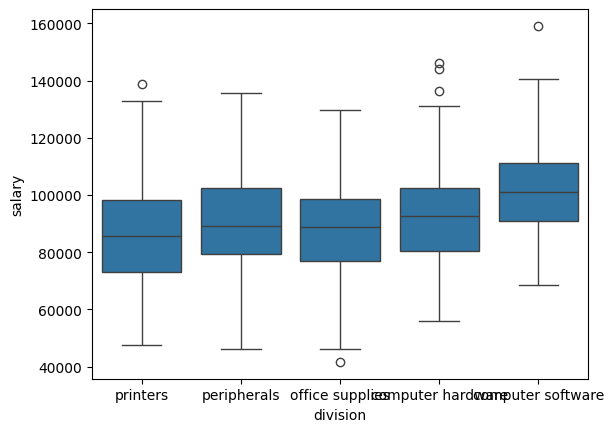

In [11]:

sns.boxplot(x='division', y='salary', data=df)


<Axes: xlabel='division', ylabel='salary'>

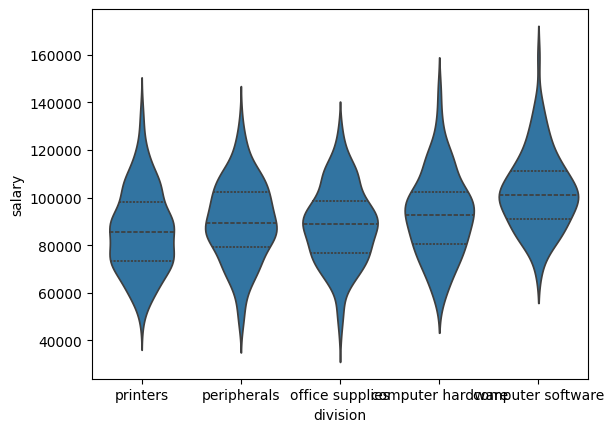

In [12]:
sns.violinplot(
    x='division',
    y='salary',
    data=df,
    inner='quartile'  # Show quartile lines
)


<Axes: xlabel='division', ylabel='salary'>

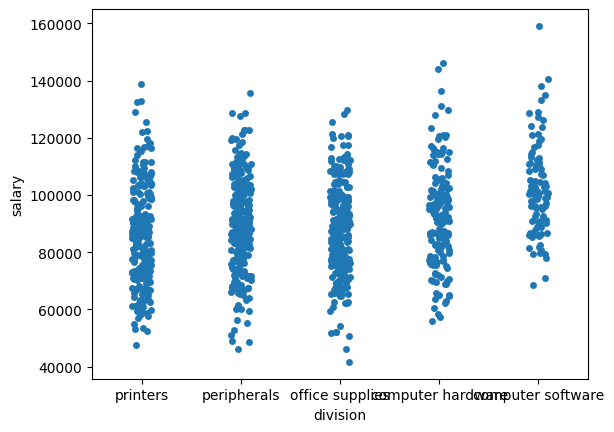

In [13]:
sns.stripplot(
    x='division',
    y='salary',
    data=df,
    jitter=True   # Add random spread to points
)

d:\Programs\reactJS\github\data-science-concepts\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Programs\reactJS\github\data-science-concepts\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Programs\reactJS\github\data-science-concepts\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='division', ylabel='salary'>

d:\Programs\reactJS\github\data-science-concepts\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Programs\reactJS\github\data-science-concepts\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Programs\reactJS\github\data-science-concepts\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


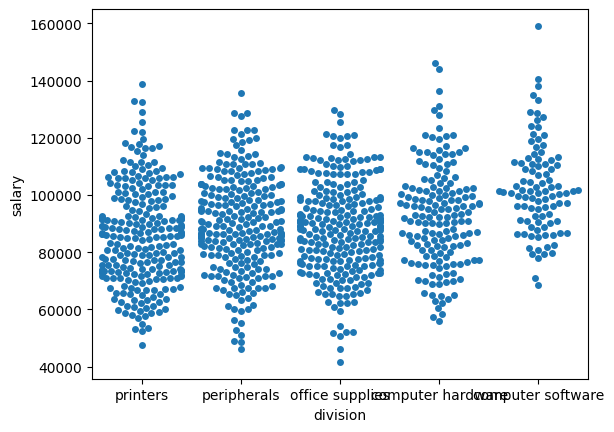

In [14]:
sns.swarmplot(x='division', y='salary', data=df)

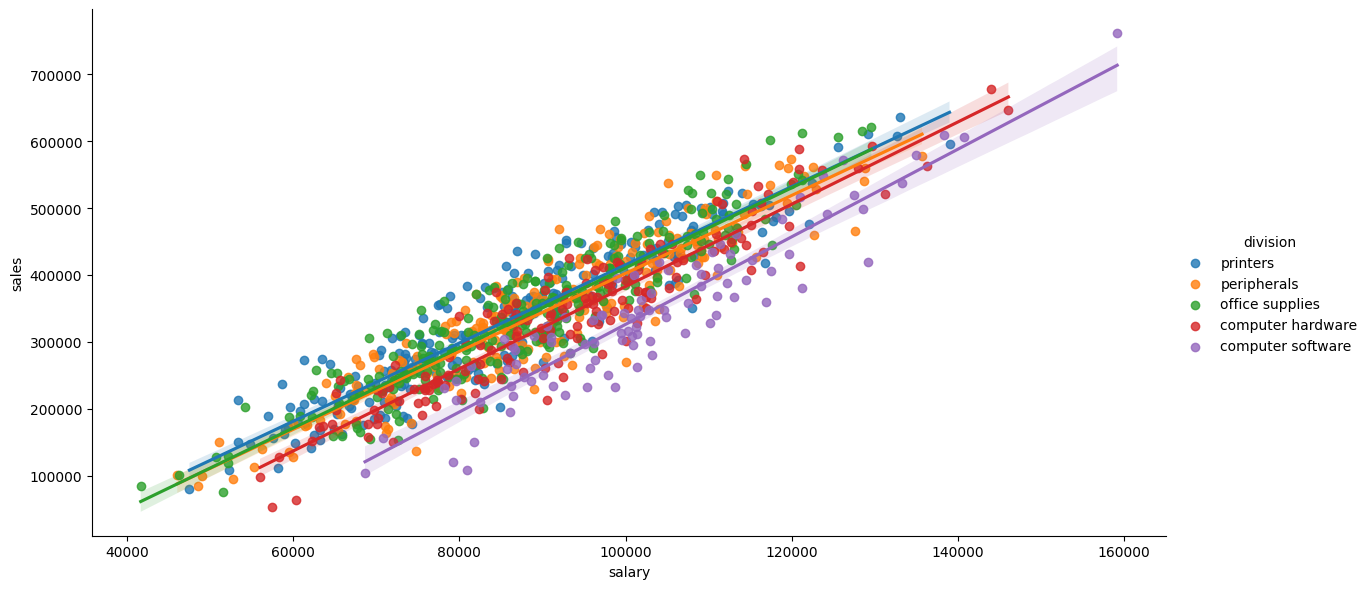

In [15]:
sns.lmplot(
    x='salary',
    y='sales',
    data=df,
    hue='division',
    height=6,
    aspect=2
)


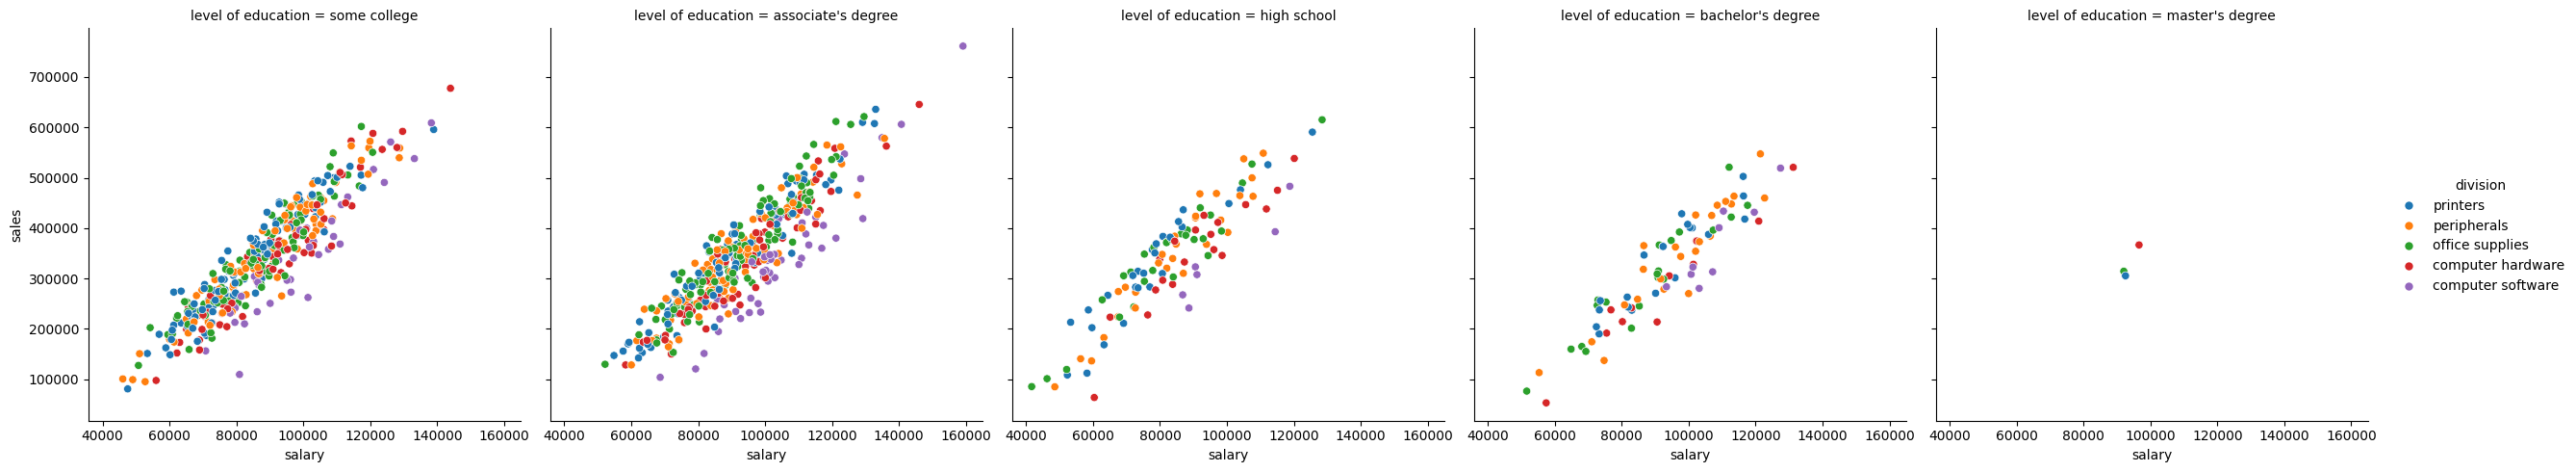

In [16]:
sns.relplot(
    x='salary',
    y='sales',
    hue='division',
    col='level of education',
    data=df
)


<Axes: >

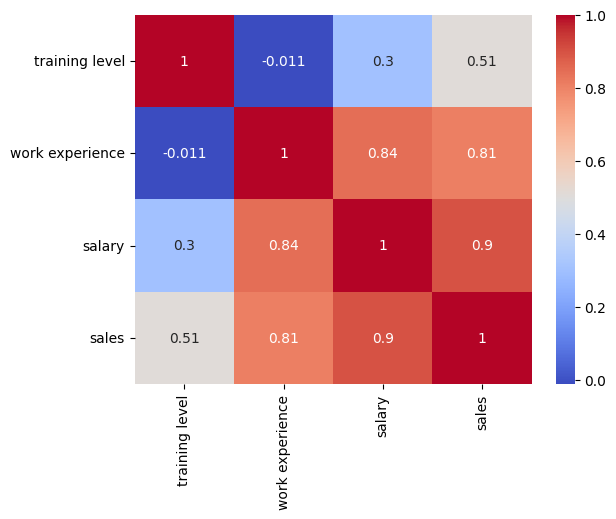

In [17]:
num_df = df.select_dtypes(include='number')   # keep numeric columns only
corr = num_df.corr()                          # or: num_df.corr(numeric_only=True) on newer pandas
sns.heatmap(corr, annot=True, cmap='coolwarm')

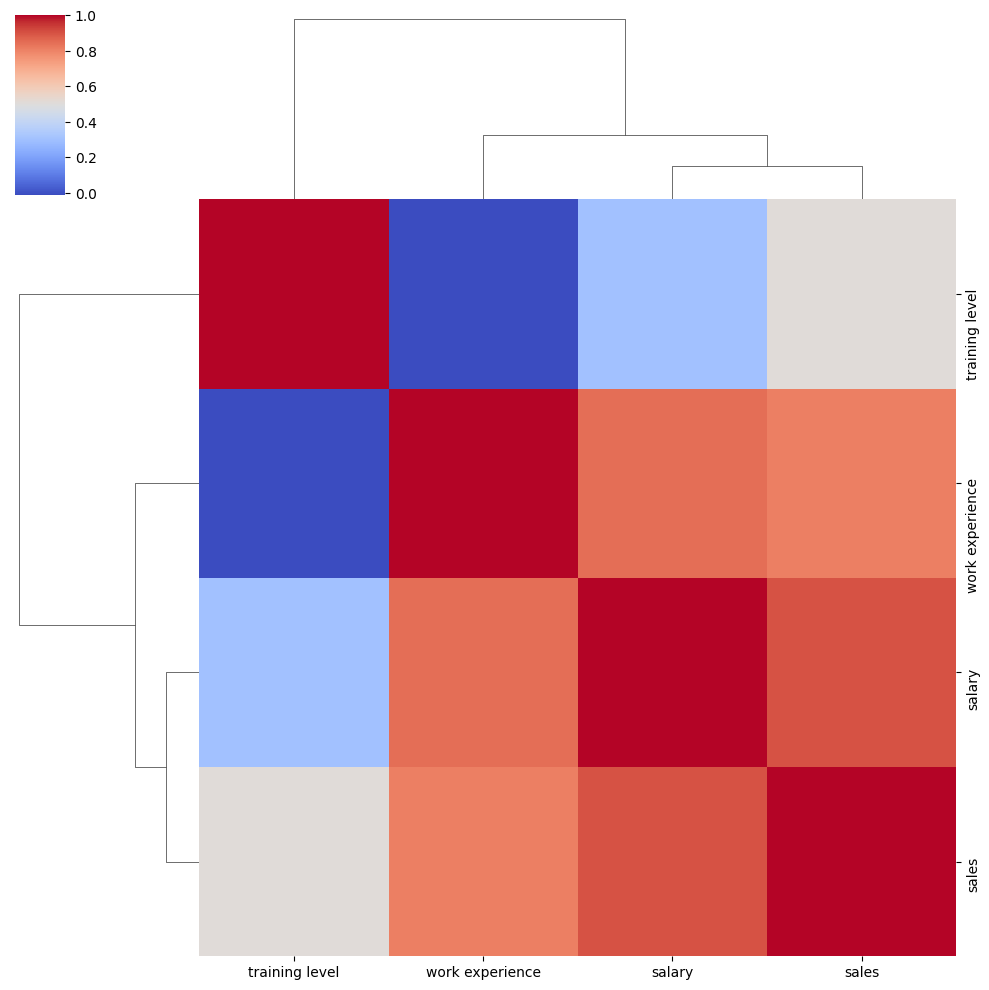

In [18]:
import seaborn as sns
import scipy  # just to confirm availability

num_df = df.select_dtypes(include='number')
corr = num_df.corr()
sns.clustermap(corr, cmap='coolwarm')


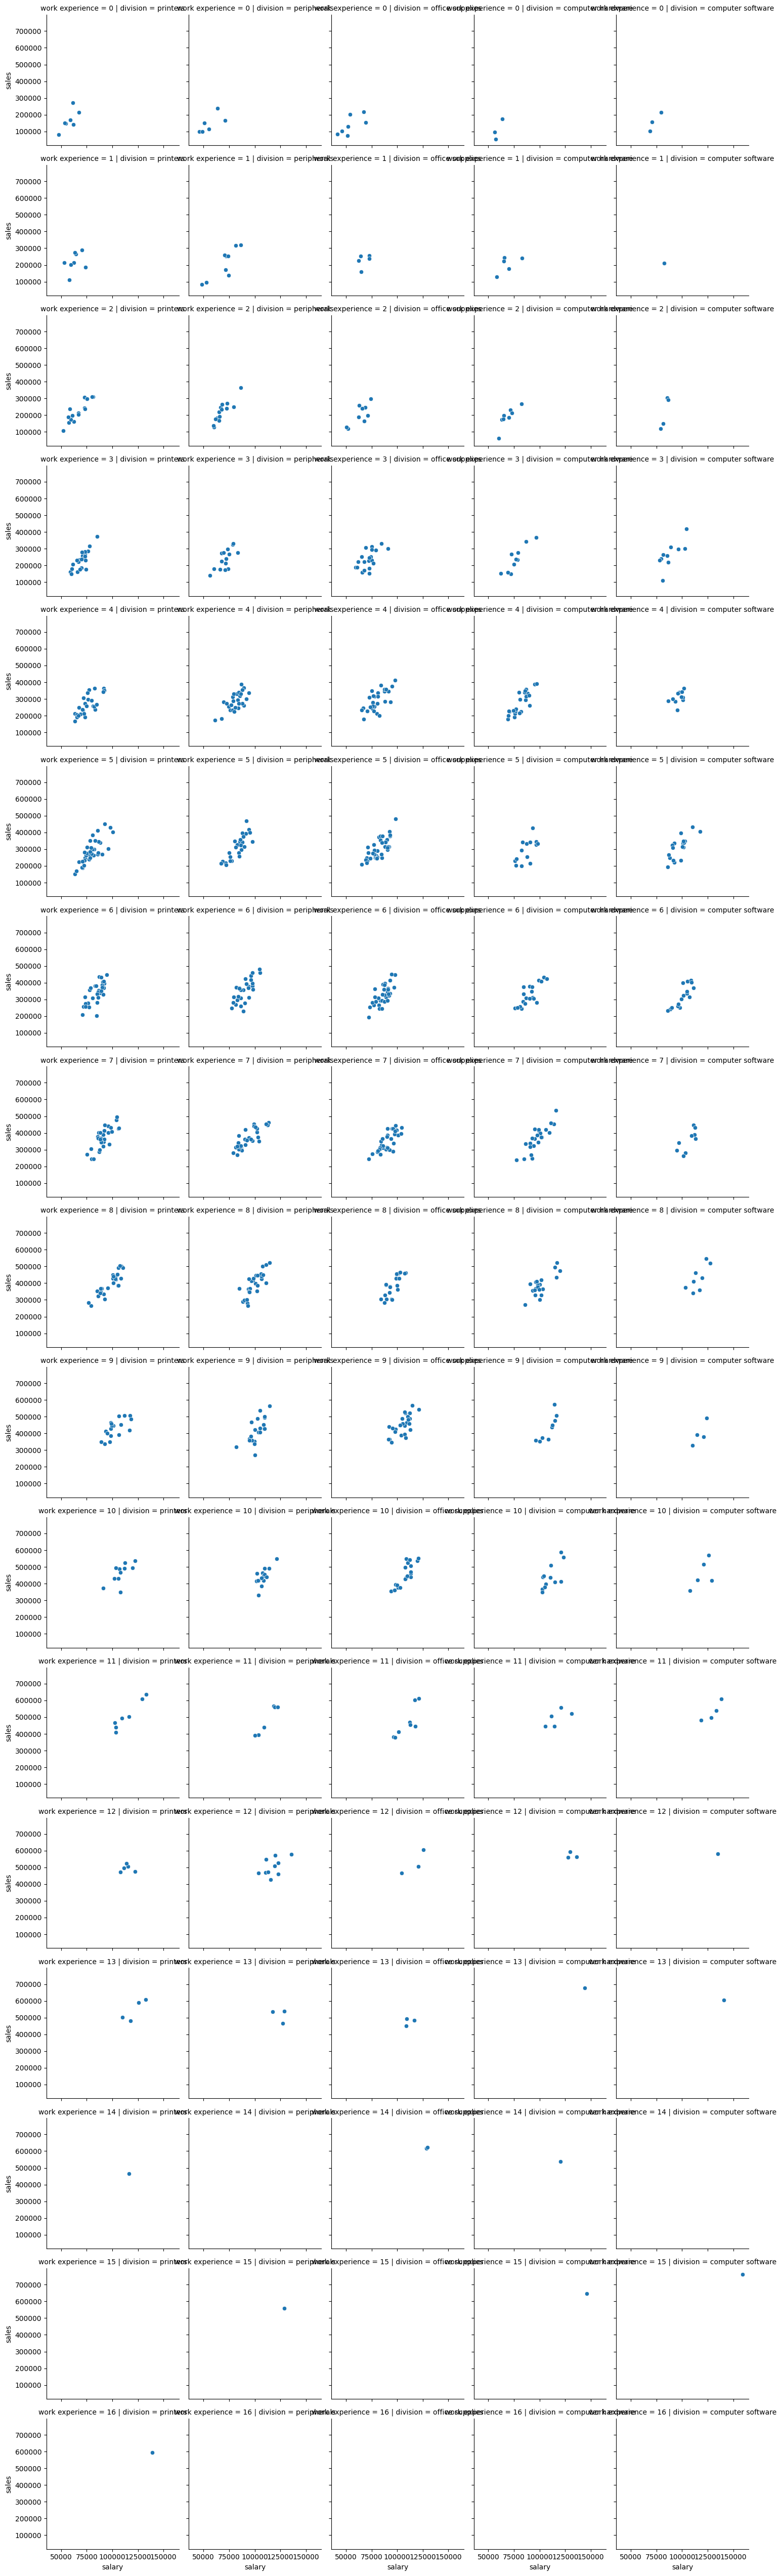

In [20]:
g = sns.FacetGrid(df, col='division', row='work experience')
g.map_dataframe(sns.scatterplot, x='salary', y='sales')

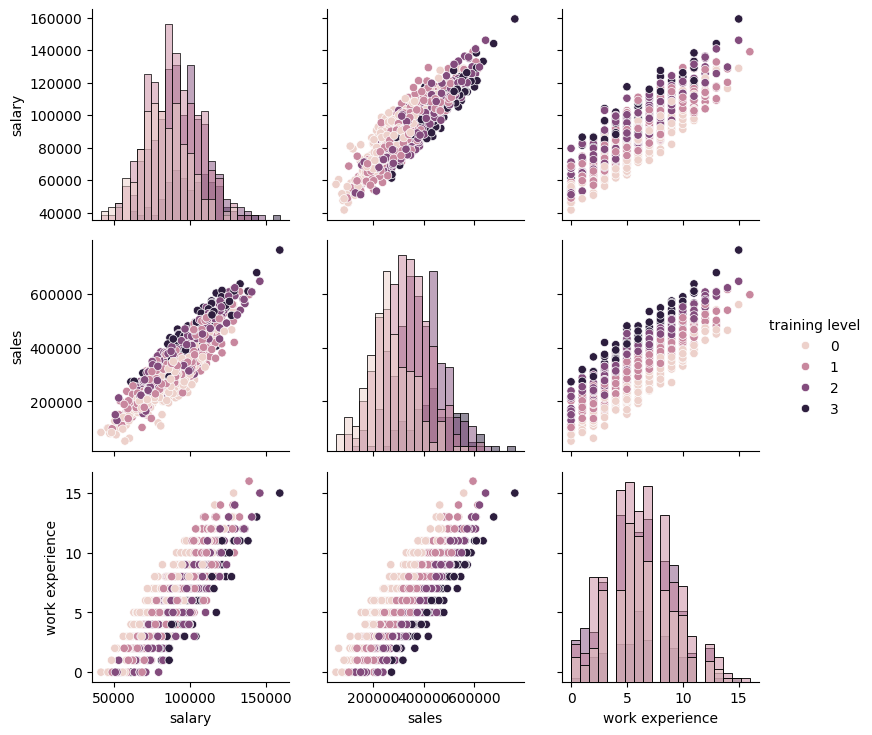

In [21]:
g = sns.PairGrid(df, vars=['salary', 'sales', 'work experience'], hue='training level')
g.map_diag(sns.histplot)     # Histograms on diagonal
g.map_offdiag(sns.scatterplot)
g.add_legend()


<Figure size 640x480 with 0 Axes>

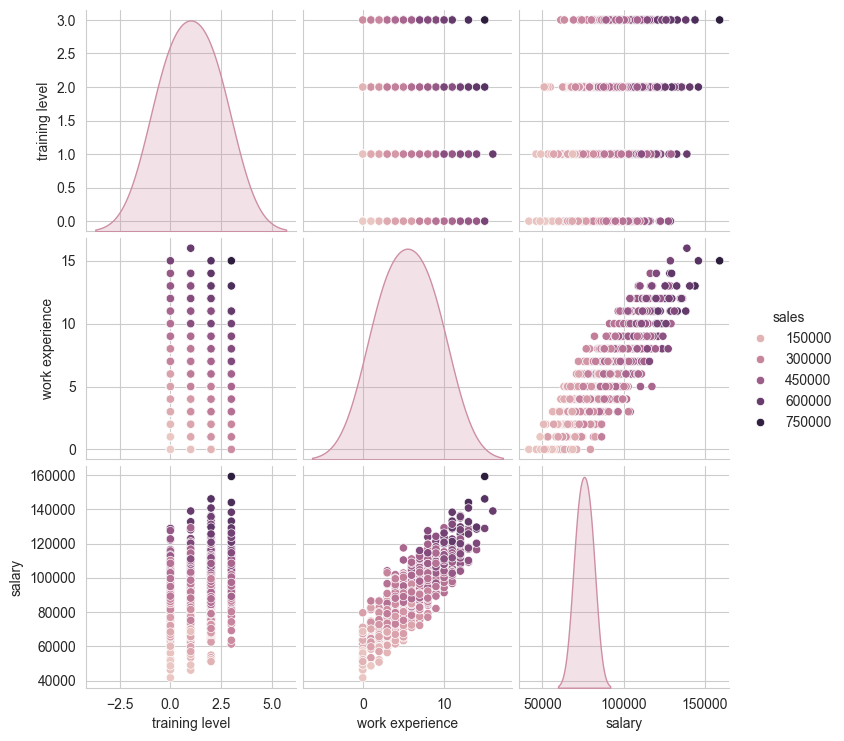

In [25]:
sns.set_style('whitegrid')   # Options: white, dark, ticks, whitegrid, darkgrid
sns.set_palette('coolwarm')
sns.despine()  # Remove top/right borders

sns.pairplot(df, hue='sales')


In [24]:
sns.set_style('whitegrid')   # Options: white, dark, ticks, whitegrid, darkgrid
sns.set_palette('coolwarm')
sns.despine()  # Remove top/right borders


<Figure size 640x480 with 0 Axes>